# Allocate renewable resources to the bus

In [18]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import contextily as cx


In [8]:
# Set up directories
cwd = os.getcwd()
if 'dev' in cwd:
    parent_dir = os.path.dirname(cwd)
    data_dir = os.path.join(parent_dir, 'data')
else:
    data_dir = os.path.join(cwd, 'data')

gis_data_dir = os.path.join(data_dir, 'gis')
if not os.path.exists(gis_data_dir):
    raise FileNotFoundError('GIS data directory not found.')

print('GIS data directory: {}'.format(gis_data_dir))

GIS data directory: /home/by276/models/NYgrid-python/data/gis


# Read data

## Thermal generators

In [84]:
# Read thermal generator locations
gen_info = pd.read_csv(os.path.join(data_dir, 
                                    'genInfo.csv'))
# Turn into geodataframe
gen_info = gpd.GeoDataFrame(gen_info, 
                            geometry=gpd.points_from_xy(gen_info.Longitude,
                                                        gen_info.Latitude))
# Set CRS
gen_info = gen_info.set_crs(epsg=4326)

gen_info.head()

,NYISOName,PTID,Zone,UnitType,FuelType,Latitude,Longitude,maxPower,minPower,maxRampAgc,maxRamp10,maxRamp30,maxRamp60,HeatRateLM_R2,HeatRateQM_R2,BusName,NCOST,cost_1,cost_0,geometry
0,Allegany,23514,B,Combined Cycle,Natural Gas,42.5083,-78.0661,66.0,11.0,0.733333,7.333333,22.00,44.0,0.862443,0.891407,62,1,22.682017,-40.234372,POINT (-78.06610 42.50830)
1,Arthur Kill ST 2,23512,J,Steam Turbine,Natural Gas,40.5915,-74.2027,349.0,96.0,2.850000,28.500000,85.50,171.0,0.995837,0.995860,82,1,25.306225,736.980064,POINT (-74.20270 40.59150)
2,Arthur Kill ST 3,23513,J,Steam Turbine,Natural Gas,40.5915,-74.2027,539.0,1.0,3.108333,31.083333,93.25,186.5,0.986235,0.991460,82,1,25.957282,993.894899,POINT (-74.20270 40.59150)
3,Astoria 2,24149,J,Steam Turbine,Natural Gas,40.7869,-73.9122,153.0,1.0,0.808333,8.083333,24.25,48.5,0.987563,0.988910,82,1,31.302863,430.832898,POINT (-73.91220 40.78690)
4,Astoria 3,23516,J,Steam Turbine,Fuel Oil 2,40.7869,-73.9122,756.0,40.0,6.033333,60.333333,181.00,362.0,0.996075,0.996269,82,1,66.084194,3680.943877,POINT (-73.91220 40.78690)


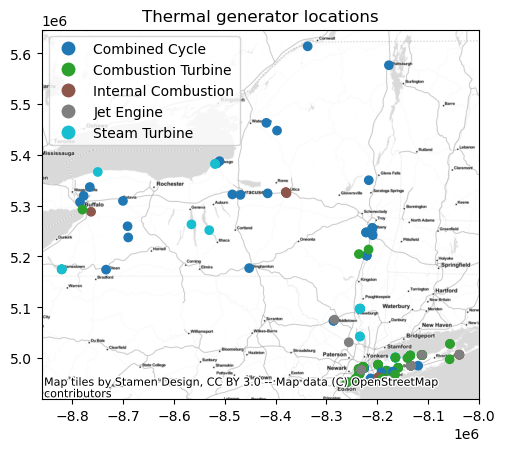

In [97]:
# Shop locations in a map
# Match web map projection
ax = gen_info.to_crs(epsg=3857).plot('UnitType', legend=True)
cx.add_basemap(ax, source=cx.providers.Stamen.TonerLite)
ax.title.set_text('Thermal generator locations')

## Solar farms

In [170]:
# Read solar farm locations
# Read current solar farm locations (aggregated by zip code)
current_solar_info = pd.read_csv(os.path.join(data_dir, 
                                    'solar',
                                    'solar_farms.csv'))
# Turn into geodataframe
current_solar_info = gpd.GeoDataFrame(current_solar_info, 
                            geometry=gpd.points_from_xy(current_solar_info.longitude,
                                                        current_solar_info.latitude))
# Set CRS
current_solar_info = current_solar_info.set_crs(epsg=4326)

current_solar_info



,zip_code,totalnameplatekwdc,latitude,longitude,geometry
0,10001,62.44,42.4561,-73.9277,POINT (-73.92770 42.45610)
1,10002,1420.19,42.7063,-74.0193,POINT (-74.01930 42.70630)
2,10003,191.47,42.6108,-74.1466,POINT (-74.14660 42.61080)
3,10004,38.28,42.5759,-73.9640,POINT (-73.96400 42.57590)
4,10007,11.07,42.4757,-73.7977,POINT (-73.79770 42.47570)
...,...,...,...,...,...
1611,14898,36.67,40.6102,-74.0878,POINT (-74.08780 40.61020)
1612,14901,492.58,40.5973,-74.0768,POINT (-74.07680 40.59730)
1613,14903,5318.50,40.5682,-74.1184,POINT (-74.11840 40.56820)
1614,14904,17.55,40.5085,-74.2445,POINT (-74.24450 40.50850)


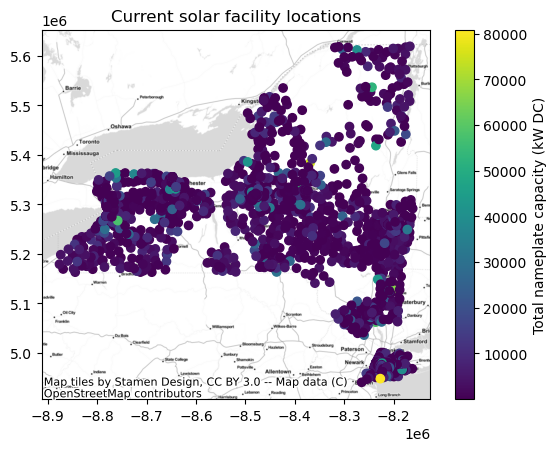

In [171]:
# Shop locations in a map
# Match web map projection
ax = current_solar_info.to_crs(epsg=3857).plot('totalnameplatekwdc',
                                               legend=True,
                                               legend_kwds={'label': 'Total nameplate capacity (kW DC)'})
cx.add_basemap(ax, source=cx.providers.Stamen.TonerLite)
ax.title.set_text('Current solar facility locations')

In [172]:
# Read future solar farm locations
future_solar_info = pd.read_csv(os.path.join(data_dir,
                                             'solar',
                                             'future_solar_farms.csv'),
                                             index_col=0)
# Turn into geodataframe
future_solar_info = gpd.GeoDataFrame(future_solar_info,
                                     geometry=gpd.points_from_xy(future_solar_info.longitude,
                                                                 future_solar_info.latitude))
# Set CRS
future_solar_info = future_solar_info.set_crs(epsg=4326)

future_solar_info


,index,FID,longitude,latitude,Zone,Local Population Density,Acres,Site Size,Site Capacity,totalnameplatekwdc,geometry
0,3245,3245,-73.639811,40.688801,K,7859.594717,218.336956,0.883579,34.459585,34459.584672,POINT (-73.63981 40.68880)
1,3246,3246,-73.632720,40.696226,K,7802.735292,33.558074,0.135805,5.296388,5296.388271,POINT (-73.63272 40.69623)
2,3244,3244,-73.664500,40.625916,K,6998.219315,73.167635,0.296099,11.547868,11547.867851,POINT (-73.66450 40.62592)
3,3243,3243,-73.667721,40.612932,K,6948.505825,11.350832,0.045935,1.791474,1791.473873,POINT (-73.66772 40.61293)
4,7209,7210,-73.530395,40.686001,K,6589.101675,16.397505,0.066358,2.587978,2587.977827,POINT (-73.53039 40.68600)
...,...,...,...,...,...,...,...,...,...,...,...
526,8442,8447,-78.768565,42.845054,A,2676.096825,12.792536,0.051770,2.019015,2019.014550,POINT (-78.76856 42.84505)
527,8665,8670,-78.719455,42.913722,A,2667.101544,121.839635,0.493068,19.229650,19229.649788,POINT (-78.71945 42.91372)
528,8373,8378,-78.839288,42.817331,A,2666.119172,10.008236,0.040502,1.579575,1579.575283,POINT (-78.83929 42.81733)
529,9086,9091,-78.809087,43.024827,A,2654.564904,12.022361,0.048653,1.897460,1897.459671,POINT (-78.80909 43.02483)


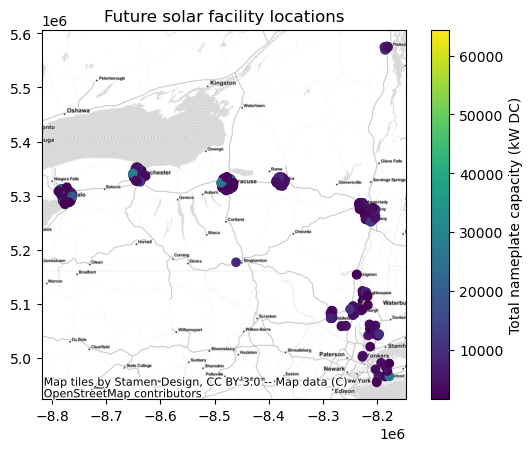

In [99]:
# Shop locations in a map
# Match web map projection
ax = future_solar_info.to_crs(epsg=3857).plot('totalnameplatekwdc', legend=True,
                                              legend_kwds={'label': 'Total nameplate capacity (kW DC)'})
cx.add_basemap(ax, source=cx.providers.Stamen.TonerLite)
ax.title.set_text('Future solar facility locations')

## Onshore wind

In [46]:
# Read onshore wind turbine locations
onshore_wind_info = pd.read_csv(os.path.join(data_dir, 
                                    'onshore_wind',
                                    'uswtdb_ny.csv'),
                                    index_col=0)
# Turn into geodataframe
onshore_wind_info = gpd.GeoDataFrame(onshore_wind_info, 
                            geometry=gpd.points_from_xy(onshore_wind_info.xlong,
                                                        onshore_wind_info.ylat))
# Set CRS
onshore_wind_info = onshore_wind_info.set_crs(epsg=4326)

onshore_wind_info


,faa_ors,faa_asn,usgs_pr_id,t_state,t_county,t_fips,p_name,p_year,p_tnum,p_cap,...,t_conf_atr,t_conf_loc,t_img_date,t_img_srce,xlong,ylat,eia_id,retrofit,retrofit_year,geometry
case_id,,,,,,,,,,,,,,,,,,,,,
3075458,36-123728,2013-WTE-439-OE,NaN,NY,Chautauqua County,36013,Arkwright Summit,2018.0,36,78.4,...,3,3,9/1/2018,Digital Globe,-79.20978,42.38207,61673.0,0,NaN,POINT (-79.20978 42.38207)
3075483,36-123754,2016-WTE-8733-OE,NaN,NY,Chautauqua County,36013,Arkwright Summit,2018.0,36,78.4,...,3,3,9/1/2018,Digital Globe,-79.22976,42.42740,61673.0,0,NaN,POINT (-79.22976 42.42740)
3075490,36-123761,2016-WTE-8740-OE,NaN,NY,Chautauqua County,36013,Arkwright Summit,2018.0,36,78.4,...,3,3,9/1/2018,Digital Globe,-79.24846,42.42875,61673.0,0,NaN,POINT (-79.24846 42.42875)
3075459,36-123729,2016-WTE-10287-OE,NaN,NY,Chautauqua County,36013,Arkwright Summit,2018.0,36,78.4,...,3,3,9/18/2018,Digital Globe,-79.21964,42.38646,61673.0,0,NaN,POINT (-79.21964 42.38646)
3075465,36-123735,2013-WTE-461-OE,NaN,NY,Chautauqua County,36013,Arkwright Summit,2018.0,36,78.4,...,3,3,9/1/2018,Digital Globe,-79.25908,42.42524,61673.0,0,NaN,POINT (-79.25908 42.42524)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3124539,36-197731,2019-WTE-9476-OE,NaN,NY,Steuben County,36101,unknown Steuben County,NaN,11,NaN,...,1,1,1/31/2022,Digital Globe,-77.51514,42.47650,NaN,0,NaN,POINT (-77.51514 42.47650)
3124566,36-197734,2019-WTE-9483-OE,NaN,NY,Steuben County,36101,unknown Steuben County,NaN,11,NaN,...,1,1,10/28/2021,Digital Globe,-77.54897,42.48269,NaN,0,NaN,POINT (-77.54897 42.48269)
3124621,36-197735,2019-WTE-9484-OE,NaN,NY,Steuben County,36101,unknown Steuben County,NaN,11,NaN,...,1,1,10/28/2021,Digital Globe,-77.55095,42.48731,NaN,0,NaN,POINT (-77.55095 42.48731)


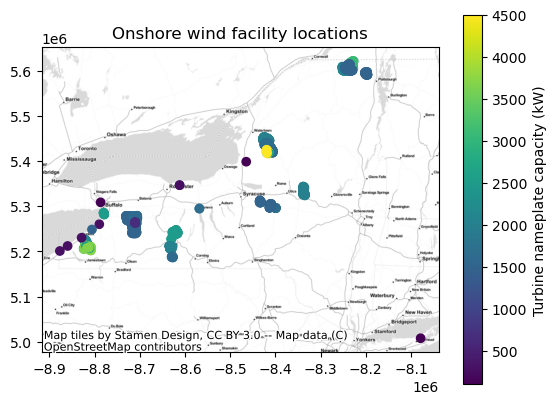

In [102]:
# Shop locations in a map
# Match web map projection
ax = onshore_wind_info.to_crs(epsg=3857).plot('t_cap', legend=True,
                                              legend_kwds={'label': 'Turbine nameplate capacity (kW)'})
cx.add_basemap(ax, source=cx.providers.Stamen.TonerLite)
ax.title.set_text('Onshore wind facility locations')

## NY Grid

In [163]:
# Read shapefile of NYISO zone map
nyiso_zone = gpd.read_file(os.path.join(gis_data_dir, 'NYISO Load Zone.shp'))
nyiso_zone = nyiso_zone.set_index('FID')

# Read shapefile of NYGrid buses
nygrid_bus = gpd.read_file(os.path.join(gis_data_dir, 'Bus.shp'))
nygrid_bus = nygrid_bus.set_index('fid')
# Convert bus type to category
nygrid_bus['busType'] = pd.Categorical(nygrid_bus['busType'])
# Filter out external buses
nygrid_bus_ny = nygrid_bus[nygrid_bus['zone'] != 0]

# Read shapefile of NYGrid branches
nygrid_branch = gpd.read_file(os.path.join(gis_data_dir, 'Branch.shp'))

# Read shapefile of NYGrid generators
nygrid_generator = gpd.read_file(os.path.join(gis_data_dir, 'Generator.shp'))


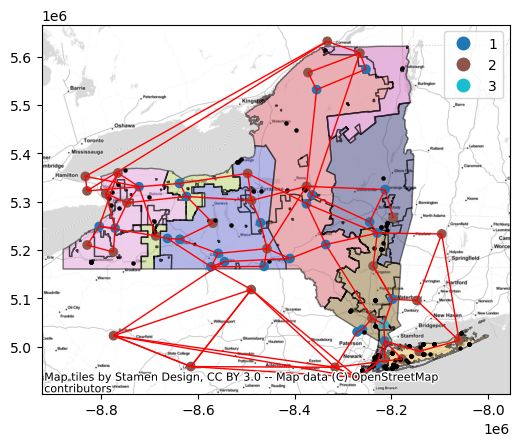

In [164]:
# NYISO zone map
ax = nyiso_zone.to_crs(epsg=3857).plot('ZONE_NAME', cmap='tab20b',
                                        alpha=0.5, edgecolor='k')

# NYGrid buses, branches, and generators
nygrid_bus.to_crs(epsg=3857).plot(ax=ax, column='busType', legend=True)
nygrid_branch.to_crs(epsg=3857).plot(ax=ax, color='red', linewidth=1)
nygrid_generator.to_crs(epsg=3857).plot(ax=ax, color='black', markersize=5)

cx.add_basemap(ax, source=cx.providers.Stamen.TonerLite)


# Nearest neighbor Allocation

In [140]:
from sklearn.neighbors import BallTree
import numpy as np

def get_nearest(src_points, candidates, k_neighbors=1):
    """Find nearest neighbors for all source points from a set of candidate points"""

    # Create tree from the candidate points
    tree = BallTree(candidates, leaf_size=15, metric='haversine')

    # Find closest points and distances
    distances, indices = tree.query(src_points, k=k_neighbors)

    # Transpose to get distances and indices into arrays
    distances = distances.transpose()
    indices = indices.transpose()

    # Get closest indices and distances (i.e. array at index 0)
    # note: for the second closest points, you would take index 1, etc.
    closest = indices[0]
    closest_dist = distances[0]

    # Return indices and distances
    return (closest, closest_dist)


def nearest_neighbor(left_gdf, right_gdf, return_dist=False):
    """
    For each point in left_gdf, find closest point in right GeoDataFrame and return them.
    
    NOTICE: Assumes that the input Points are in WGS84 projection (lat/lon).
    """
    
    left_geom_col = left_gdf.geometry.name
    right_geom_col = right_gdf.geometry.name
    
    # Ensure that index in right gdf is formed of sequential numbers
    right = right_gdf.copy().reset_index(drop=True)
    
    # Parse coordinates from points and insert them into a numpy array as RADIANS
    left_radians = np.array(left_gdf[left_geom_col].apply(lambda geom: (geom.x * np.pi / 180, geom.y * np.pi / 180)).to_list())
    right_radians = np.array(right[right_geom_col].apply(lambda geom: (geom.x * np.pi / 180, geom.y * np.pi / 180)).to_list())
    
    # Find the nearest points
    # -----------------------
    # closest ==> index in right_gdf that corresponds to the closest point
    # dist ==> distance between the nearest neighbors (in meters)
    
    closest, dist = get_nearest(src_points=left_radians, candidates=right_radians)

    # Return points from right GeoDataFrame that are closest to points in left GeoDataFrame
    closest_points = right.loc[closest]
    
    # Ensure that the index corresponds the one in left_gdf
    closest_points = closest_points.reset_index(drop=True)
    
    # Add distance if requested 
    if return_dist:
        # Convert to meters from radians
        earth_radius = 6371000  # meters
        closest_points['distance'] = dist * earth_radius
        
    return closest_points

## Solar

In [168]:
# TODO: Filter by NYISO zone!
closest_bus = nearest_neighbor(current_solar_info, nygrid_bus_ny, return_dist=True)

In [169]:
closest_bus.geometry

0       POINT (-73.92300 42.49400)
1       POINT (-74.06600 42.64600)
2       POINT (-74.06600 42.64600)
3       POINT (-73.92300 42.49400)
4       POINT (-73.92300 42.49400)
                   ...            
1611    POINT (-73.93199 40.67903)
1612    POINT (-73.93199 40.67903)
1613    POINT (-74.19943 41.16083)
1614    POINT (-74.29861 41.12408)
1615    POINT (-74.19943 41.16083)
Name: geometry, Length: 1616, dtype: geometry

In [173]:
# Rename the geometry of closest stops gdf so that we can easily identify it
closest_bus = closest_bus.rename(columns={'geometry': 'closest_bus_geom'})

# Merge the datasets by index (for this, it is good to use '.join()' -function)
current_solar_info = current_solar_info.join(closest_bus)

# Let's see what we have
current_solar_info.head()

,zip_code,totalnameplatekwdc,latitude,longitude,geometry,busIdx,busType,u,name,Vn,...,owner,numGen,sumGenP0,sumGenQ0,numLoad,sumLoadP0,sumLoadQ0,ny_final,closest_bus_geom,distance
0,10001,62.44,42.4561,-73.9277,POINT (-73.92770 42.45610),37,1,1,NEW SEATHED,345.0,...,1,0,0.0,0.0,0,0.0,0.0,1,POINT (-73.92300 42.49400),1278.579263
1,10002,1420.19,42.7063,-74.0193,POINT (-74.01930 42.70630),40,1,1,NEW SEATHED,230.0,...,1,0,0.0,0.0,0,0.0,0.0,1,POINT (-74.06600 42.64600),5510.280503
2,10003,191.47,42.6108,-74.1466,POINT (-74.14660 42.61080),40,1,1,NEW SEATHED,230.0,...,1,0,0.0,0.0,0,0.0,0.0,1,POINT (-74.06600 42.64600),9026.180699
3,10004,38.28,42.5759,-73.9640,POINT (-73.96400 42.57590),37,1,1,NEW SEATHED,345.0,...,1,0,0.0,0.0,0,0.0,0.0,1,POINT (-73.92300 42.49400),5208.537975
4,10007,11.07,42.4757,-73.7977,POINT (-73.79770 42.47570),37,1,1,NEW SEATHED,345.0,...,1,0,0.0,0.0,0,0.0,0.0,1,POINT (-73.92300 42.49400),13944.201782


In [174]:
current_solar_info['distance'].describe()

count     1616.000000
mean     13933.565086
std      11500.143755
min        182.759237
25%       5953.940639
50%      10597.202943
75%      17477.198825
max      75263.975424
Name: distance, dtype: float64

In [175]:
from shapely.geometry import LineString

# Create a link (LineString) between building and stop points
current_solar_info['link'] = current_solar_info.apply(lambda row: LineString([row['geometry'], row['closest_bus_geom']]), axis=1)

# Set link as the active geometry
current_solar_info_links = current_solar_info.copy()
current_solar_info_links = current_solar_info_links.set_geometry('link')

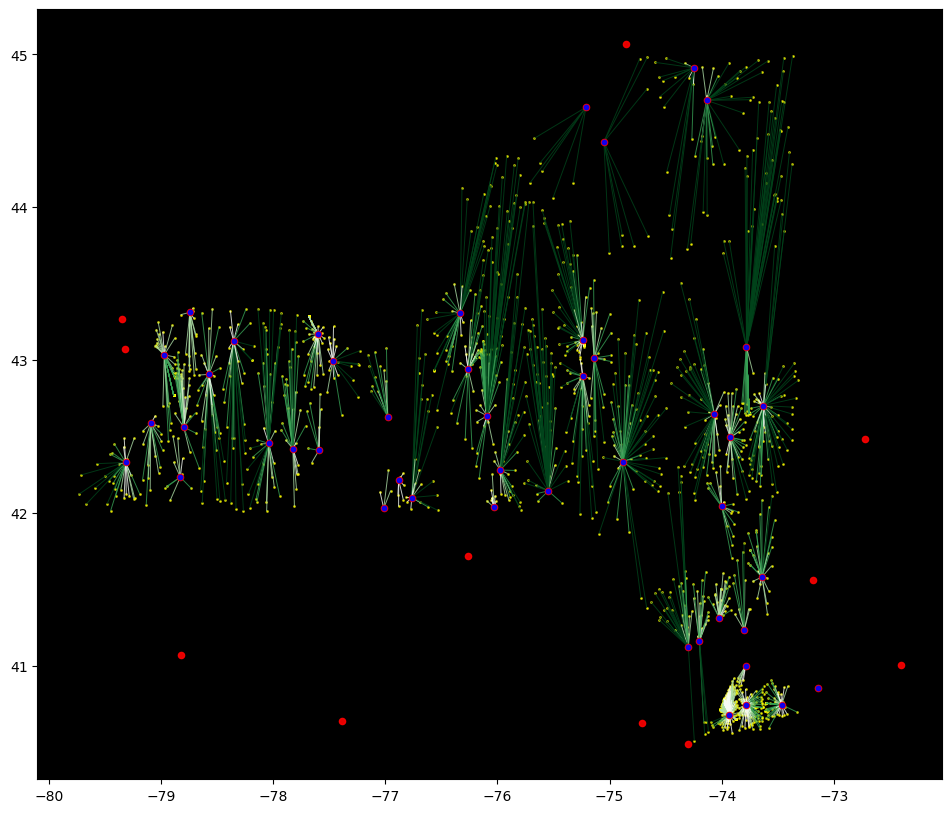

In [177]:
# Plot the connecting links between buildings and stops and color them based on distance
ax = current_solar_info_links.plot(column='distance', cmap='Greens', scheme='quantiles', k=4, alpha=0.8, lw=0.7, figsize=(13, 10))
ax = current_solar_info.plot(ax=ax, color='yellow', markersize=1, alpha=0.7)
ax = nygrid_bus.plot(ax=ax, markersize=20, marker='o', color='red', alpha=0.9, zorder=3)
ax = nygrid_bus_ny.plot(ax=ax, markersize=10, marker='o', color='blue', alpha=0.9, zorder=3)
# Zoom closer
# ax.set_xlim([24.99, 25.01])
# ax.set_ylim([60.26, 60.275])

# Set map background color to black, which helps with contrast
ax.set_facecolor('black')